<a href="https://colab.research.google.com/github/Barbhuiya12/Machine-Learning-/blob/main/Multiple_linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the libraries**

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


**Importing the dataset**

In [4]:
df = pd.read_csv(r"50_Startups.csv")


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


**Taking Variables** 

In [51]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]


**Encoding categorical data**

In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))


In [54]:
print(X)

[[0.00e+00 0.00e+00 1.00e+00 1.65e+05 1.37e+05 4.72e+05]
 [1.00e+00 0.00e+00 0.00e+00 1.63e+05 1.51e+05 4.44e+05]
 [0.00e+00 1.00e+00 0.00e+00 1.53e+05 1.01e+05 4.08e+05]
 [0.00e+00 0.00e+00 1.00e+00 1.44e+05 1.19e+05 3.83e+05]
 [0.00e+00 1.00e+00 0.00e+00 1.42e+05 9.14e+04 3.66e+05]
 [0.00e+00 0.00e+00 1.00e+00 1.32e+05 9.98e+04 3.63e+05]
 [1.00e+00 0.00e+00 0.00e+00 1.35e+05 1.47e+05 1.28e+05]
 [0.00e+00 1.00e+00 0.00e+00 1.30e+05 1.46e+05 3.24e+05]
 [0.00e+00 0.00e+00 1.00e+00 1.21e+05 1.49e+05 3.12e+05]
 [1.00e+00 0.00e+00 0.00e+00 1.23e+05 1.09e+05 3.05e+05]
 [0.00e+00 1.00e+00 0.00e+00 1.02e+05 1.11e+05 2.29e+05]
 [1.00e+00 0.00e+00 0.00e+00 1.01e+05 9.18e+04 2.50e+05]
 [0.00e+00 1.00e+00 0.00e+00 9.39e+04 1.27e+05 2.50e+05]
 [1.00e+00 0.00e+00 0.00e+00 9.20e+04 1.35e+05 2.53e+05]
 [0.00e+00 1.00e+00 0.00e+00 1.20e+05 1.57e+05 2.57e+05]
 [0.00e+00 0.00e+00 1.00e+00 1.15e+05 1.23e+05 2.62e+05]
 [1.00e+00 0.00e+00 0.00e+00 7.80e+04 1.22e+05 2.64e+05]
 [0.00e+00 0.00e+00 1.00e+00 9.

**Splitting the dataset into the Training set and Test set**

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Training the Multiple Linear Regression model on the Training set**

In [56]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

**Predicting the Test set results**

In [67]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
z=y_pred.reshape(len(y_pred),1)
p=y_test.values.reshape(len(y_test),1)
print(np.concatenate((z,p),1))


[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


**Plotting the both predicted and Trained data** 


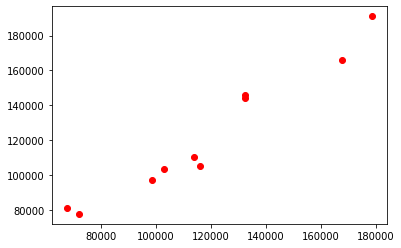

In [72]:
plt.scatter(y_pred, y_test, color = 'red')



**Multiple Linear Regresson Equation** 

In [73]:
print(regressor.coef_)
print(regressor.intercept_)

[ 8.66e+01 -8.73e+02  7.86e+02  7.73e-01  3.29e-02  3.66e-02]
42467.52924853204


Therefore, the equation of our multiple linear regression model is:
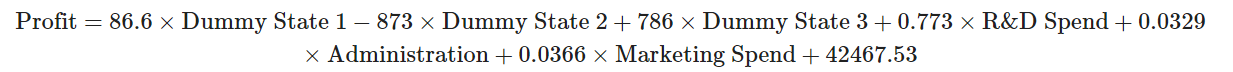

Making a single prediction (for example the profit of a startup with R&D Spend = 160000, Administration Spend = 130000, Marketing Spend = 300000 and State = 'California')

In [76]:
print(regressor.predict([[1, 0, 0, 160000, 130000, 300000]]))

[181566.92]


 Notice also that the "California" state was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the second row of the matrix of features X, "California" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, not the last three ones, because the dummy variables are always created in the first columns.